# 注意：
本Notebookはアニメーションを用いている。このため，JupyterLabでエラーが生じた場合（IPythonとのインタフェースが不備のもよう，2020年9月時点），いったん，JupyterLabを終了して，Jupyter Notebookを立ち上げてから，再実行してください。

# モンテカルロ法，円周率を求める
実行上の注意：<br>
・1セル毎に実行すること

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML
%matplotlib nbagg
%matplotlib inline

Examples e

2.719357


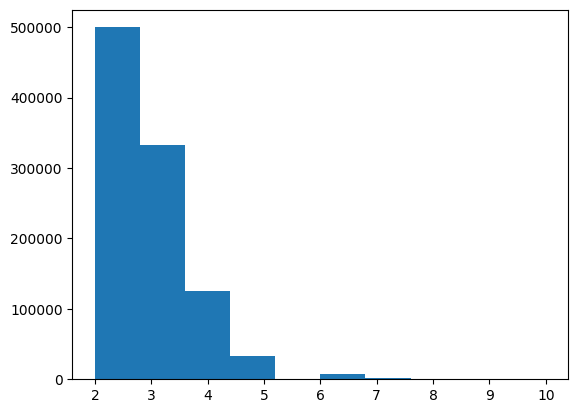

In [7]:
def ne():
    s = 0
    i = 0
    while s < 1:
        s += random.random()
        i += 1
    return i

n = 1000000
t = 0
result_list = []
for _ in range(n):
    i = ne()
    t += i
    result_list.append(i)
print(t / n)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(result_list, bins=10)
plt.show()

#### Excercise 円周率
<br>
アニメーションを用いて処理速度が遅いので，データ数は高々数百点までが望ましい。

<ipython-input-16-44e8949ad367>:24: RuntimeWarning: divide by zero encountered in scalar divide
  pi_est = count/N


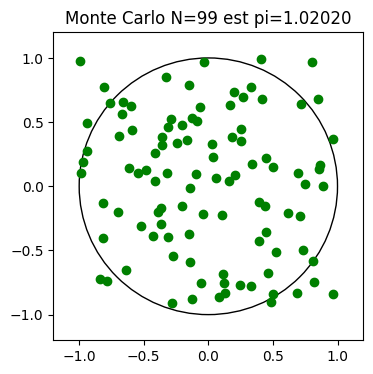

In [ ]:
np.random.seed(123)
fig, ax = plt.subplots(figsize=(4,4))
ucircle = pat.Circle(xy = (0.0, 0.0), radius = 1.0, edgecolor = 'black', fill=False)
ax.add_patch(ucircle)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

count=0

def func_pi(N, fig_title, dummy):
    global count
    x,y = np.random.uniform(low=-1, high=1, size=2)
    ### edit below! 以下の式を変えて下さい! ###
    # count if it is true in the below function 以下を満たすものをカウントする
    judge = x + y <= 2.0
    ###########################################
    if judge:
        plt.scatter(x, y, marker='o', color='green')
    else:
        plt.scatter(x, y, marker='x', color='red')
    count += judge
    ### edit below! 以下の式を変えて下さい! ###
    # calculate the estimated pi 推測されるπを計算する
    pi_est = count/N
    ###########################################
    plt.title(fig_title+' N='+str(N)+' est pi='+'{:1.5f}'.format(pi_est))

# If it takes too much time, please decrease the value of "frames"
# もし時間がかかりすぎる場合は"frame"の数を減らして下さい
ani = animation.FuncAnimation(fig, func_pi, fargs = ('Monte Carlo',1.0), \
    interval = 10, frames = 100, repeat=False)
HTML(ani.to_jshtml())

plt.show()

In [ ]:
#plt.savefig('fig_SM_MonteCarlo.png', bbox_inches='tight')

円周率を4桁合せるにもデータ数は10**7程度必要<br>
core i7プロセッサレベルを用いても時間を要する。<br>
この高速化は，Numbaを用いるかマルチプロセスを用いる方法がある。<br>
この高速化の詳細は「Pythonデータエンジニアリング入門 高速化とデバイスデータアクセスの基本と応用」（オーム社）参照。

In [ ]:
print(np.pi)

In [ ]:
np.random.seed(123)

In [ ]:
# %%timeit -r 3 -n 1
N = 10**8
x,y = np.random.uniform(low=-1, high=1, size=(2,N))
inside = (x**2 + y**2) <= 1
pi = inside.sum()*(4/np.float(N))
print('N=',N, 'Calculation pi =',pi)

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

**Exercise**